# Exploratory Data Analysis Challenge

Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players.

<b>Goal:</b> Given the dataset , perform an Exploratory Data Analysis and derive some insights

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Loading Dataset

- We'll load the dataframe in pandas, drop the unnecessary columns and display the first 10 rows of the dataset.

In [3]:
# Reading Csv file
data = pd.read_csv("data.csv")

# Dropping the first column named Unnamed:0
data.drop(columns=['Unnamed: 0'], axis=1, inplace = True)

In [4]:
# Display first 10 rows of the dataset

data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,59,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,81,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,25,...,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
8,342437cd2b5680,7acbacbed1b711,99cbf12f555f61,0,2,338.70,2,0,15,6,...,1,3349.0,0,0.0,0,0,1846.00,5,0,0.7174
9,3cf3cc81325a37,537c4bd393dcff,38a8b94623d77d,2,1,230.80,2,0,1,8,...,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387


In [5]:
# Shape of Dataset

print('Shape of Dataset: {}'.format(data.shape))

print('Number of Rows: {}'.format(data.shape[0]))

print('Number of Columns: {}'.format(data.shape[1]))

Shape of Dataset: (1111742, 29)
Number of Rows: 1111742
Number of Columns: 29


In [6]:
# Information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

## Identifying Numerical and Categorical Columns

In [7]:
# Numerical

# Select Numeric columns from dataset
numeric_data = data.select_dtypes(['int64','float64'])

# Save numerical columns in a variable 
numeric_cols = numeric_data.columns

# Display Numeric Columns
# print(numeric_cols)


# Display Names of Numeric Columns
print('Numerical Columns: {}'.format(list(numeric_data)))

Numerical Columns: ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


In [9]:
# Categorical Columns

# Select Categorical columns from dataset
categorical_data = data.select_dtypes('object')

# Save Categorical columns in a variable 
categorical_cols = categorical_data.columns

# Display Categorical Columns
# print(categorical_cols)


# Display Names of Categorical Columns
print('Categorical Columns: {}'.format(list(categorical_data)))

Categorical Columns: ['Id', 'groupId', 'matchId', 'matchType']


# Identifying Missing Values

- One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

In [10]:
# Check Null values

data.isnull().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [11]:
# Last Column i.e winPlacePerc contains null/missing values

# Finding Number of missing values in that column

colname = data.isnull().sum().index[-1]

val_mis = data.isnull().sum()[-1]

print('Number of Missing values in {} column : {}'.format(colname,val_mis))

Number of Missing values in winPlacePerc column : 1


### Missing Values Treatment

The given dataset is a pretty clean dataset except there exist only 1 missing value in winPlacePerc column.

There are two methods of dealing with missing data

- Dropping them
- Imputing them.

Depending on the case we can allow a specific proportion of missing values, beyond which we might want to drop the variable from analysis.

If the information contained in the variable is not that high, we can drop the variable if it has more than 50% missing values.

In [12]:
# Only 1 value in missing in winPlacePerc Column

# We can impute missing value with 'mean' of that column

mean = np.mean(data[colname])

data[colname].fillna(mean , inplace = True)

## Fill null values in continuous features

There are no null values in any of the continuous columns in this dataset. But when null values exist in a continuous column, a good approach would be to impute them.

There exists many approach to missing-data imputation and they usually depend on the problem and how the data algorithm behaves. If the features are numeric we can use simple approaches, such as average values and sampling from the feature distribution.

Missing values in continuous data are mostly imputed using mean or median but is totally dependent on us and our problem.

In [13]:
# imputing missing values with mean

for col in numeric_data:
    
    mean = data[col].mean()
    
    data[col].fillna(mean,inplace = True)

# Exploratory Data Analyis

## 1. Univariate Analysis

In [14]:
# Descriptive stats about Dataset

data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073770e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


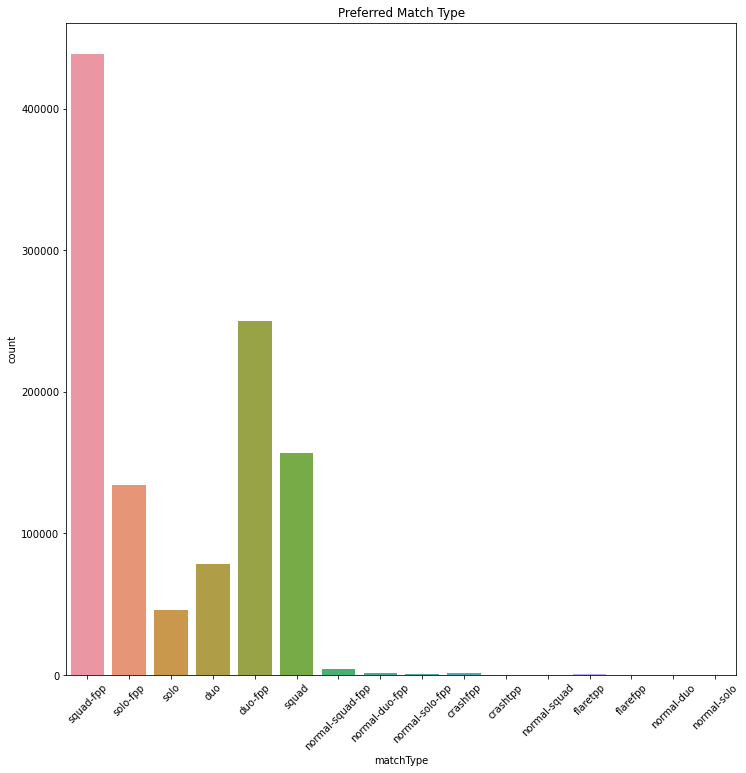

In [15]:
# Preferred Match Type in the game

plt.figure(figsize=(12,12))

sns.countplot(data['matchType'])

plt.title('Preferred Match Type')

plt.xticks(rotation=45)

plt.show()

# Observation :

- The most preferred match mode by players in this game is <b>squad-fpp</b>

- This is followed by <b>duo-fpp</b>

# Detecting outliers in the continuous columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond <b>(third quartile + 1.5xIQR)</b> and <b>below (first quartile - 1.5xIQR).</b>

In [16]:
cols = list(data) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe to

for column in numeric_cols: # Iterating thorough each feature            
        # first quartile (Q1)
        q1 = data[column].quantile(0.25) 
            
        # third quartile (Q3)
        q3 = data[column].quantile(0.75)
            
        # IQR
        iqr = q3 - q1
        
        fence_low = q1 - (1.5*iqr)
        
        fence_high = q3 + (1.5*iqr)
        
        # finding the number of outliers using 'and(|) condition. 
        total_outlier = data[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]
        
        # finding percentage of outliers
        percent = (total_outlier / len(data[column]))*100
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,assists,194611,17.505051
1,boosts,35533,3.196155
2,damageDealt,54026,4.859581
3,DBNOs,73607,6.620871
4,headshotKills,187930,16.904102
5,heals,81625,7.342081
6,killPlace,0,0.000000
7,killPoints,0,0.000000
8,kills,129163,11.618073
9,killStreaks,13391,1.204506


In [ ]:
# Now checking Distribution of Continous Columns and their corresponding Boxplot

In [17]:
# Considering damageDealt Column

col_name = 'damageDealt'

mean = np.mean(data['damageDealt'])

median = np.median(data['damageDealt'])

mode = data['damageDealt'].mode()

print('Mean of {} column: {}'.format(col_name,mean))

print('Median of {} column: {}'.format(col_name,median))

print('Mode of {} column: {}'.format(col_name,mode))

Mean of damageDealt column: 130.73640731139562
Median of damageDealt column: 84.11
Mode of damageDealt column: 0    0.0
dtype: float64


In [18]:
# We can conclude that the average damage dealt by a player is around 130.73

<AxesSubplot:xlabel='damageDealt'>

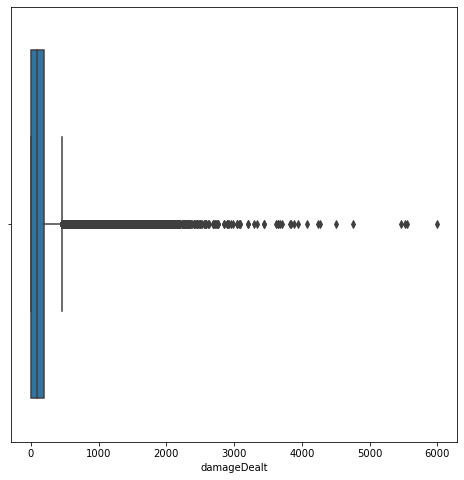

In [19]:
# Boxplot to detect outliers in damageDealt column

plt.figure(figsize=(8,8))

sns.boxplot(data['damageDealt'])

## Observation

- We can see that the column damageDealt contains a high percentage of outliers to the above the 1.5IQR

- We expect the probability distribution graph of this column to be long tailed towards the right , and distribution to be <b>Log Normal</b>

<AxesSubplot:xlabel='damageDealt', ylabel='Density'>

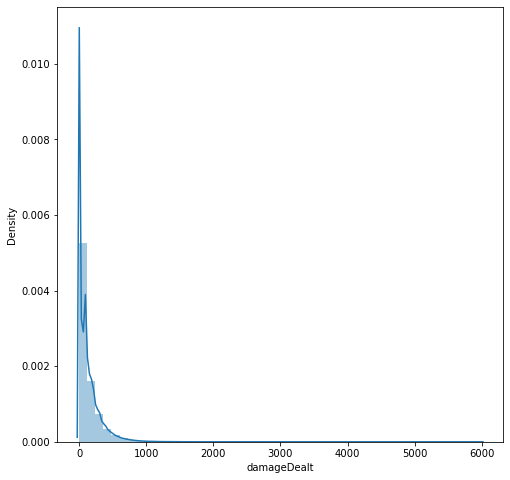

In [20]:
# Plotting Distribution graph

plt.figure(figsize=(8,8))

sns.distplot(data['damageDealt'])

In [21]:
skew = data['damageDealt'].skew()

print('Skewness: {}'.format(skew))

Skewness: 3.014092759211592


## Observation

- The Distribution of damageDealt column appears due to be a <b>Log Normal Distribution due to presence of high percentage of outliers.</b>

In [22]:
# Columns having percentage of outliers greater than 10

colnames_10g = list(outliers[outliers['Percentage'] > 10].Feature)

colnames_10g

['assists',
 'headshotKills',
 'kills',
 'longestKill',
 'maxPlace',
 'numGroups',
 'revives',
 'rideDistance']

In [23]:
# Columns having percentage of outliers less than 10

colnames_10l = list(outliers[outliers['Percentage'] < 10].Feature)

colnames_10l

['boosts',
 'damageDealt',
 'DBNOs',
 'heals',
 'killPlace',
 'killPoints',
 'killStreaks',
 'matchDuration',
 'rankPoints',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

### Plotting Boxplot of Columns having low percentage of outliers (percent < 10)

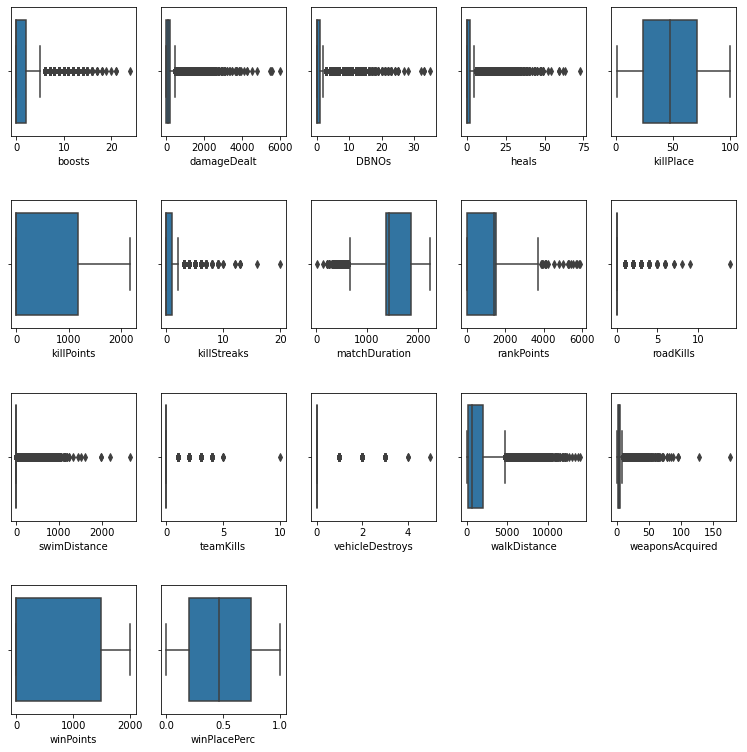

In [24]:
# Columns having low percentage of outliers

i = 1

plt.figure(figsize = (13,13))

plt.subplots_adjust(hspace = 0.5)

for col in colnames_10l:
    
    plt.subplot(4,5,i)
    
    sns.boxplot(data[col])
    
    i = i+1

## Plotting Displot of Columns having high percentage of outliers (percent > 10)¶

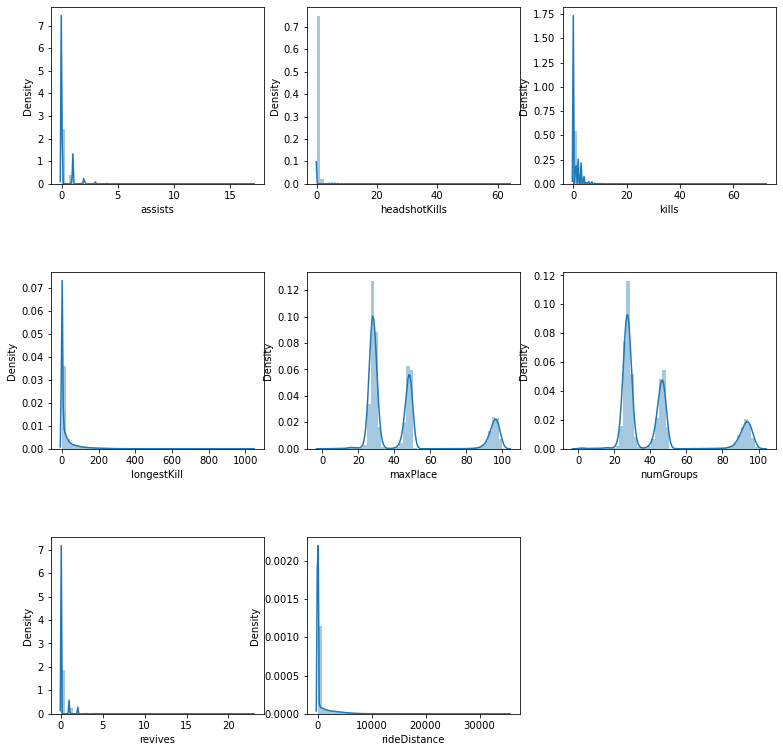

In [25]:
# Checking Probablity distribution of Columns having high percentage of outliers (percent > 10)

i = 1

plt.figure(figsize = (13,13))

plt.subplots_adjust(hspace = 0.5)

for col in colnames_10g:
    
    plt.subplot(3,3,i)
    
    sns.distplot(data[col])
    
    i = i+1

In [ ]:
# Plotting for Average match duration in the game

In [26]:
# Average Match Duration (in Minutes)

mean_m = (data['matchDuration']/60).mean()

print('Average Match Duration: {}'.format(str(round(mean_m,2)) + ' minutes'))

Average Match Duration: 26.32 minutes


<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

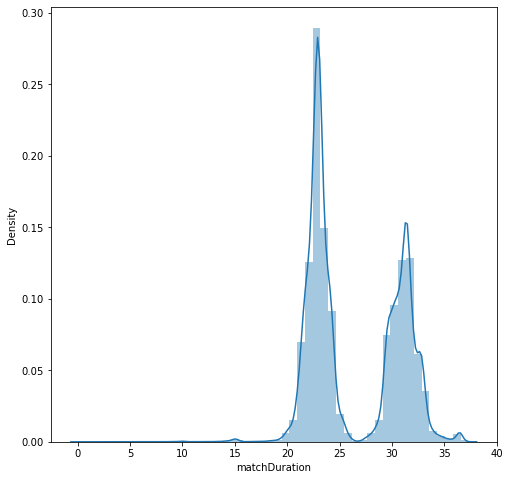

In [27]:
# Analysing Average Match Duration Distplot

plt.figure(figsize = (8,8))

sns.distplot(data['matchDuration']/60)

## Observation

- On average a match lasts for around 26.32 minutes

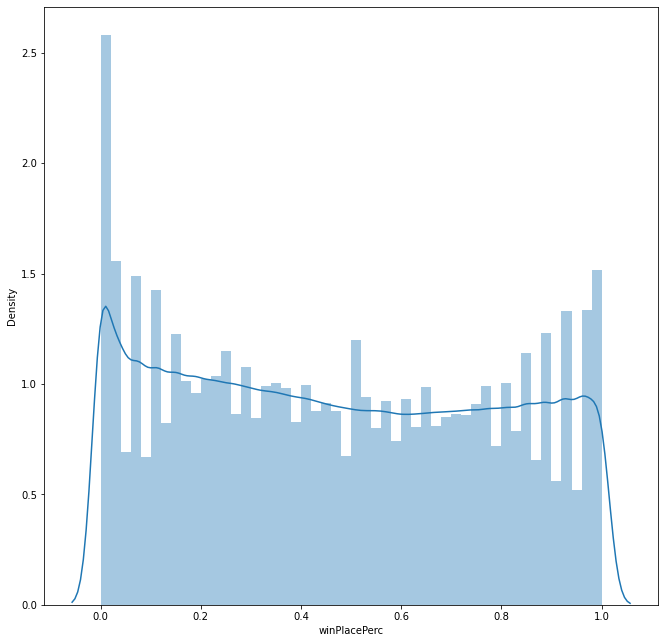

In [28]:
# Analysing Win place percentage Distribution

# Plotting distplot

plt.figure(figsize = (11,11))

sns.distplot(data['winPlacePerc'])

plt.show()

In [29]:
data['winPlacePerc'].mean()

0.47278682372965924

## Observation

- On average the win percentage of a player/team is 0.47

# Bivariate Analysis

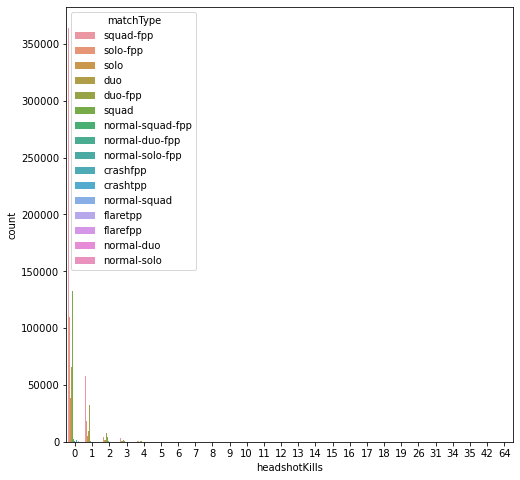

In [30]:
# Analysing Headshot Kills on basis of Match Type

# Plotting Countplot

plt.figure(figsize = (8,8))

sns.countplot(data['headshotKills'],hue=data['matchType'])

plt.show()

# Observation

- Mostly the number of Headshot Kills per match by a player is 0 -_-

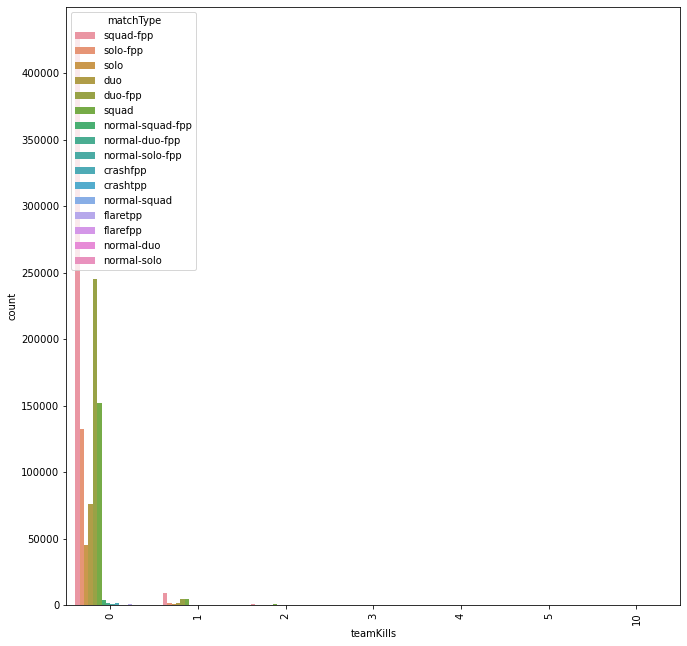

In [31]:
# Analysing teamKills on basis of Match Type

# Plotting Countplot

plt.figure(figsize = (11,11))

sns.countplot(data['teamKills'],hue=data['matchType'])

plt.xticks(rotation = 90)

plt.show()

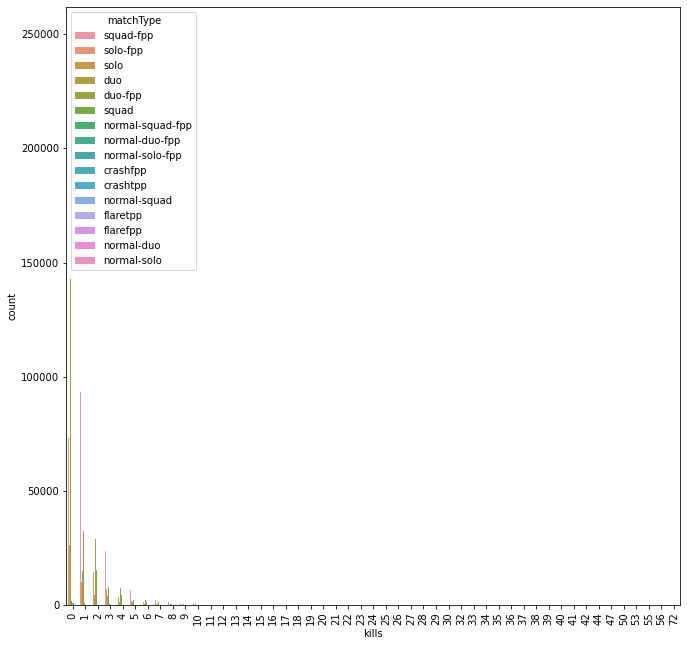

In [32]:
# Analysing Killpoint on basis of Match Type

# Plotting Countplot

plt.figure(figsize = (11,11))

sns.countplot(data['kills'],hue=data['matchType'])

plt.xticks(rotation = 90)

plt.show()

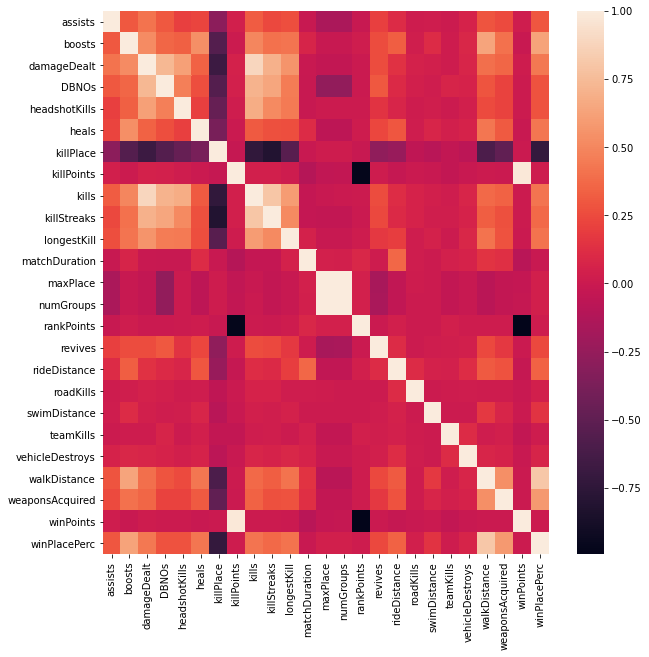

In [33]:
# Correlation Plot

plt.figure(figsize=(10,10))

sns.heatmap(data.corr())

plt.show()

# Observations from Correlation Plot


- Kills per match is highly correlated to Damage Dealt per match
<br>

- Kills Points and Win points have a percent correlation of 1 (i.e if kills points for a player/team is high then their win points is also high and vice-versa.
<br>

- Win points and rank points are highly negative correlated (no correlation at all)

In [ ]:
# The end